### ***Chess Openings: Analyzing Sucess***

NOTE: Place .csv file into the local runtime files in Collab for data to show


# **Introduction**:

Chess is a centuries-old board game that has captivated the minds of enthusiasts, scholars, and strategists alike. Beyond its entertainment value, chess offers a unique opportunity for data scientists to delve into the world of strategy, decision-making, and statistical analysis. In this project, we'll unravel the secrets behind the success of different chess openings, leveraging the power of data science techniques to provide valuable insights into this timeless game.

# **The Chess Opening: A Critical Phase in the Game**

The opening phase of a chess game is a critical moment where players lay the foundation for their mid-game and endgame strategies. Chess openings are well-established sequences of moves that have been studied, practiced, and refined over centuries. Understanding the success of various openings can not only be enlightening for chess players but also offer valuable insights into decision-making processes and strategic planning in other domains.

# **The Objectives of the Project**

The primary objective is to explore and analyze the success of different chess openings based on historical game data. By doing so, we aim to answer the vital questions: which chess openings are the most successful in competitive play? We'll investigate the winning percentages, draw rates, and losing percentages associated with various openings to identify patterns of success.



In [ ]:
!jupyter nbconvert --execute --to html "ENMHW1.ipynb"

[NbConvertApp] Converting notebook ENMHW1.ipynb to html
[NbConvertApp] Writing 874668 bytes to ENMHW1.html


# **EDA + Cleaning Introduction**


In the following sections, we'll embark on a comprehensive exploration of the chess dataset, poised to unravel the intriguing world of chess openings. The primary goal is to dissect and analyze the success of various openings, shedding light on which strategies have historically proven to be the most formidable on the chessboard. To accomplish this, we'll employ a range of data science techniques, from data cleaning to exploratory data analysis (EDA). We'll delve into the intricate relationships between the realtions of opening names, sides (white or black), the number of games played, average player performance ratings, and win percentages.

# **Cleaning**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('high_elo_opening.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

#Summary statistics
print(df.describe())

df.info()

                                        opening_name   side  num_games  ECO  \
0                 Alekhine Defense, Balogh Variation  white        692  B03   
1               Alekhine Defense, Brooklyn Variation  black        228  B02   
2               Alekhine Defense, Exchange Variation  white       6485  B03   
3                Alekhine Defense, Four Pawns Attack  white        881  B03   
4  Alekhine Defense, Four Pawns Attack, Fianchett...  black        259  B03   

  last_played_date  perf_rating  avg_player  perc_player_win  perc_draw  \
0       2018-06-22         2247        2225             40.8       24.3   
1       2018-06-27         2145        2193             29.8       22.4   
2       2018-07-06         2244        2194             40.8       27.7   
3       2018-06-20         2187        2130             39.7       23.2   
4       2018-05-20         2122        2178             37.8       21.2   

   pec_opponent_win  ... move2b move3w move3b move4w move4b perc_white_win

# **EDA (Explaratory Data Analysis)**

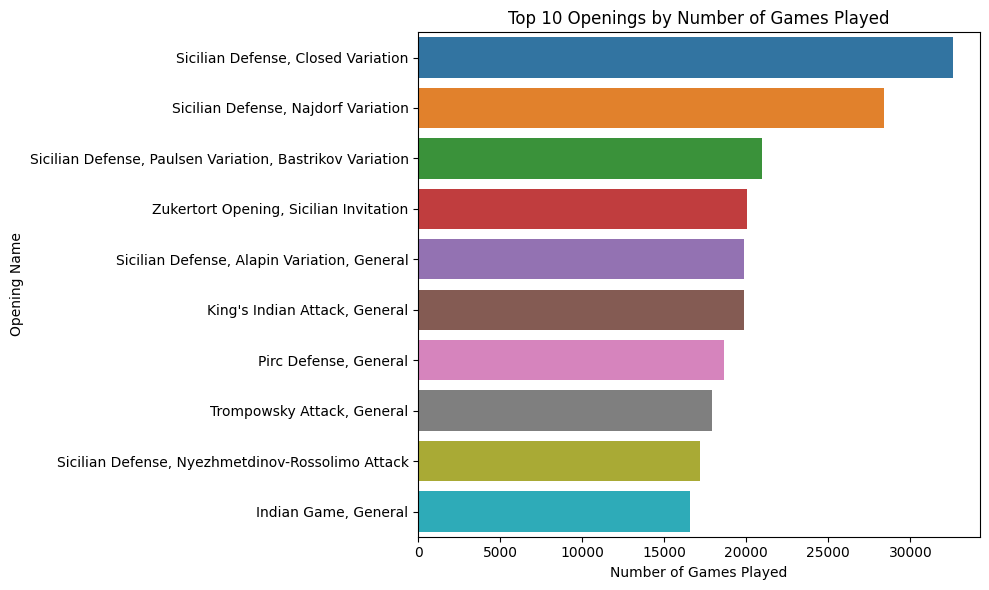

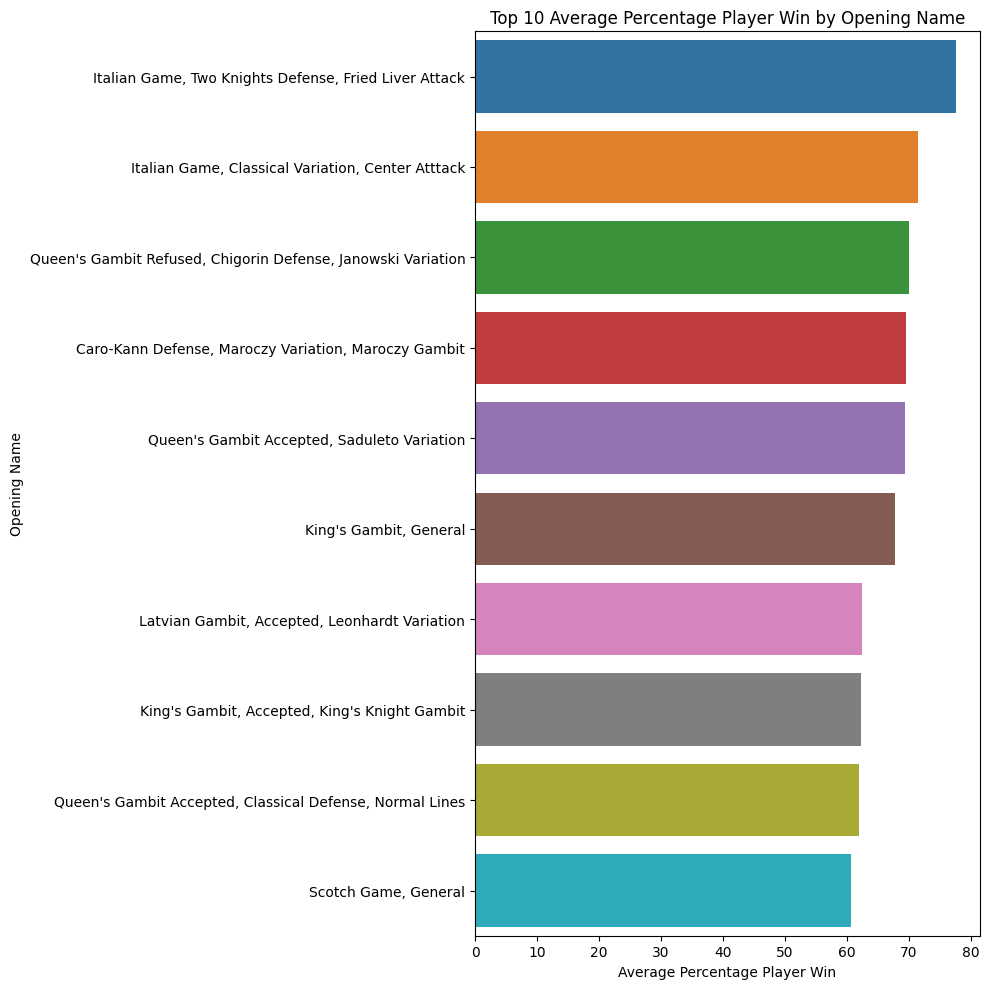

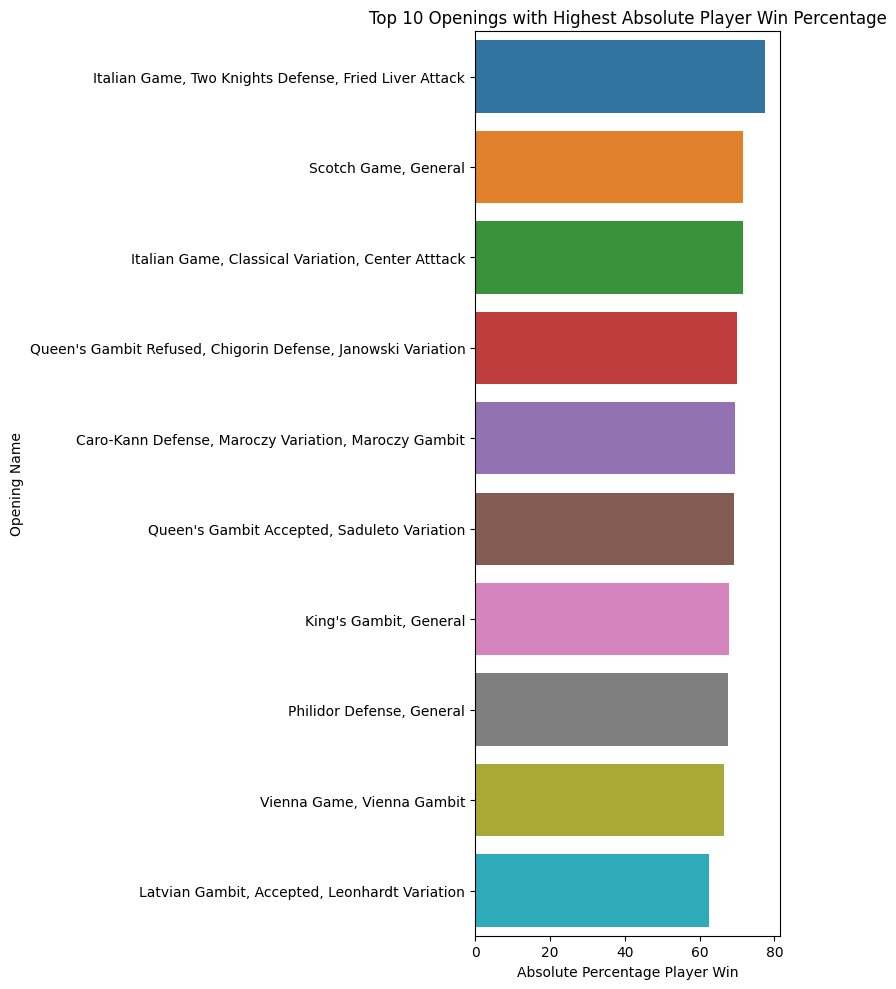

In [ ]:
from datetime import datetime, timedelta

# Group and aggregate data by 'opening_name' and calculate the sum of 'num_games'
opening_games = df.groupby('opening_name')['num_games'].sum().reset_index()

# Sort the data by total 'num_games' in descending order
opening_games = opening_games.sort_values(by='num_games', ascending=False)

# Select the top 10 opening names
top_10_openings = opening_games.head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 10 openings by the number of games played
sns.barplot(x='num_games', y='opening_name', data=top_10_openings, orient='h')
plt.title('Top 10 Openings by Number of Games Played')
plt.xlabel('Number of Games Played')
plt.ylabel('Opening Name')

# Show the plot
plt.tight_layout()
plt.show()






# Group and aggregate data by 'opening_name' and calculate the mean 'perc_player_win'
opening_data = df.groupby('opening_name')['perc_player_win'].mean().reset_index()

# Sort the data by mean 'perc_player_win' in descending order
opening_data = opening_data.sort_values(by='perc_player_win', ascending=False)

# Select the top 10 opening names
top_10_openings = opening_data.head(10)

# Set the figure size with increased width and height
plt.figure(figsize=(10, 10))  # Adjust both width and height as needed

# Create a horizontal bar plot for the top 10 openings by average percentage player win
sns.barplot(x='perc_player_win', y='opening_name', data=top_10_openings, orient='h')
plt.title('Top 10 Average Percentage Player Win by Opening Name')
plt.ylabel('Opening Name')
plt.xlabel('Average Percentage Player Win')

# Show the plot
plt.tight_layout()
plt.show()



# Calculate the absolute player win percentage for each opening
df['abs_perc_player_win'] = df['perc_player_win']

# Sort the data by absolute player win percentage in descending order
sorted_openings = df.sort_values(by='abs_perc_player_win', ascending=False)

# Select the top 10 opening names with the highest absolute player win percentage
top_10_openings = sorted_openings.head(10)

# Set the figure size with increased width for a sideways plot
plt.figure(figsize=(8, 10))  # Adjust the width and height as needed

# Create a bar plot for the top 10 openings with the highest absolute player win percentage
sns.barplot(x='abs_perc_player_win', y='opening_name', data=top_10_openings)
plt.title('Top 10 Openings with Highest Absolute Player Win Percentage')
plt.xlabel('Absolute Percentage Player Win')
plt.ylabel('Opening Name')

# Show the plot
plt.tight_layout()
plt.show()


# **Conclusion**

This comprehensive analysis of chess openings spanning the past five decades has brought to light the unparalleled popularity of the Sicilian Defense (Closed Variation) and the clear success of the Fried Liver Attack. These openings has consistently stood out as the preferred choice among chess players. Their  appeal can be attributed to several factors, including their adaptability to diverse game scenarios, their multiple variations, their ability to foster complex tactical battles, and most importantly their capacity to confound opponents.

Although our data shows meaningful and somewhat expected results for most popular and most successful opening, there is no overlap between graphs. There is no one opening that appears in two of one of our three graphs: the top 10 for most games played, the top 10 for greatest win percentage, and the top 10 for the greatest average win percentage. This could be due to a multitude of reasons, one being that win percentages are skewed given a disparity of number of games being played with a given opening. Also, average player rating of individuals who play less/more advanced openings will definetly affect win percentage.

So what is the answer? Is there a best opening? I would say that the number of games played is a less important metric when considering this question; it more lays the groundwork for showing correlation with popularity and actual winning. But since there seems to be little overlap with this dataset, you should be better suited observing the openings with the greater win percentages, like the Italian Game and Queen's gambit variations, along with the Caro Kahn.

This project not only illuminates the past but also provides invaluable insights into the dynamic and evolving world of chess openings. Given the evidence in this dataset, we cannot firmly confclude a best chess opening, but our data leads us in the right direction in the case we want to make educated guesses.

# **Kaggle Source**

https://www.kaggle.com/datasets/arashnic/chess-opening-dataset